In [50]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import xlsxwriter
import re
from collections import Counter

In [51]:
file_path = r'D:\Python\pinterest_data_selenium_3.xlsx'
df_main = pd.read_excel(file_path)

In [52]:
print(df_main.columns)

Index(['Unnamed: 0', 'Hashtag', 'Title', 'Image URL', 'Image Description'], dtype='object')


In [54]:
hashtag_counts = df['Hashtag'].value_counts()
print(hashtag_counts)
# Create a DataFrame from counts
counts_df = pd.DataFrame(hashtag_counts).reset_index()
counts_df.columns = ['Hashtag', 'count']

# Merge counts back into original DataFrame
df_merge = pd.merge(df_main, counts_df, on='Hashtag')

print(df_merge.columns)


Hashtag
AntiAging               15
Longevity               13
HealthyLiving           12
HolisticHealth          12
SuperfoodPowder         11
WholeFoodSupplements    10
CoffeeFruit              9
OrganicLiving            9
MindBodySoul             9
HealthyAging             9
BrainBoost               8
HealthAndWellness        8
Wellness                 8
HealthSupplements        8
BrainHealth              8
NaturalRemedies          7
Superfoods               7
FitnessNutrition         7
YouthfulSkin             7
Nutrition                7
VeganSupplements         7
CognitiveHealth          7
PlantBased               6
ProteinPowder            6
CleanEating              5
Name: count, dtype: int64
Index(['Unnamed: 0', 'Hashtag', 'Title', 'Image URL', 'Image Description',
       'count'],
      dtype='object')
     Unnamed: 0       Hashtag  \
0             0   CoffeeFruit   
1             1   CoffeeFruit   
2             2   CoffeeFruit   
3             3   CoffeeFruit   
4           

In [55]:
print(df_merge)

     Unnamed: 0       Hashtag  \
0             0   CoffeeFruit   
1             1   CoffeeFruit   
2             2   CoffeeFruit   
3             3   CoffeeFruit   
4             4   CoffeeFruit   
..          ...           ...   
210         210  HealthyAging   
211         211  HealthyAging   
212         212  HealthyAging   
213         213  HealthyAging   
214         214  HealthyAging   

                                                 Title  \
0    🔥🔥🔥Hawaii Luau Company- Hawaii's Premiere Corp...   
1    a bowl filled with oatmeal sitting on top of a...   
2                   a flock of birds flying in the sky   
3    a table topped with a wooden bowl filled with ...   
4                a person is pouring coffee into a cup   
..                                                 ...   
210                                  Skin care results   
211            8 Diet Changes Women Must Make After 40   
212  an older man and woman running on the beach wi...   
213  This Ingredient Us

In [94]:
# Plotting
plt.figure(figsize=(12, 20))
plt.bar(df['Hashtag'], df['count'], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Counts of Hashtags')
plt.xticks(rotation=90)

plt.savefig('Count_of_hashtags.png')
plt.clf()

<Figure size 1200x2000 with 0 Axes>

In [57]:
def extract_hashtags(text):
    if pd.isna(text):
        return []
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags
# Apply the function to extract hashtags from 'Title' column
df['Extracted_Hashtags'] = df['Title'].apply(extract_hashtags)

print(df[['Title', 'Extracted_Hashtags']])


                                                 Title  \
0    🔥🔥🔥Hawaii Luau Company- Hawaii's Premiere Corp...   
1    a bowl filled with oatmeal sitting on top of a...   
2                   a flock of birds flying in the sky   
3    a table topped with a wooden bowl filled with ...   
4                a person is pouring coffee into a cup   
..                                                 ...   
210                                  Skin care results   
211            8 Diet Changes Women Must Make After 40   
212  an older man and woman running on the beach wi...   
213  This Ingredient Used To Be On "No" Lists — Why...   
214  an older woman sitting on top of a tree stump ...   

                                    Extracted_Hashtags  
0    [botanybeauty, cleanbeauty, organicbeauty, lux...  
1                                                   []  
2                                                   []  
3                                                   []  
4                 

In [62]:
df_merge['Extracted_Hashtags'] = df['Extracted_Hashtags']
print(df_merge.columns)

Index(['Unnamed: 0', 'Hashtag', 'Title', 'Image URL', 'Image Description',
       'count', 'Extracted_Hashtags'],
      dtype='object')


In [89]:
all_hashtags = [tag for tags in df['Extracted_Hashtags'] for tag in tags]
hashtag_counts = Counter(all_hashtags)

# Convert to DataFrame for plotting
counts_df = pd.DataFrame(hashtag_counts.items(), columns=['Extracted_Hashtags', 'Count'])

# Sort by Count descending for better visualization
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(30,30))
plt.bar(counts_df['Extracted_Hashtags'], counts_df['Count'], color='skyblue',width=0.8)
plt.xlabel('Extracted_Hashtags')
plt.ylabel('Count')
plt.title('Count of Extracted Hashtags')
plt.xticks(rotation=90)
plt.savefig('count_of_extracted_hashtags.png')
plt.clf()



C:\Users\siris\AppData\Local\Temp\ipykernel_38340\3933195949.py:17: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.savefig('count_of_extracted_hashtags.png')


<Figure size 3000x3000 with 0 Axes>

C:\Users\siris\AppData\Local\Temp\ipykernel_38340\521703253.py:7: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.savefig('count_of_extracted_hashtags.png')


<Figure size 2000x4000 with 0 Axes>

In [76]:
print(counts_df)

     Extracted_Hashtags  Count
25      WellnessJourney     10
27        HealthyLiving     10
113           antiaging      7
22    HealthSupplements      7
52   NaturalSupplements      7
..                  ...    ...
11         birthdaycake      1
12       proteinrecipes      1
13         proteinshake      1
14        proteinpowder      1
15               shakes      1

[400 rows x 2 columns]


In [64]:
text = " ".join(df['Title'].astype(str).tolist())
print(text)

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print(sentiment)


blob = TextBlob(text)
sentiment1 = blob.sentiment
print(f"Polarity: {sentiment1.polarity}, Subjectivity: {sentiment1.subjectivity}")

🔥🔥🔥Hawaii Luau Company- Hawaii's Premiere Corporate Event, Luau, Wedding and Entertainment Company.  www.hawaiiluaucompany.com   Hawaii's premier organic beauty brand PC:@malieorganics 🤙🏼🌺🌴 Spring into gorgeous skin with BotanyBeauty’s Firming Cream! For skin of all ages and skin types especially with concerns of dull & dry skin or fine lines & wrinkles! 💐 #botanybeauty #cleanbeauty #organicbeauty #luxurybeauty #veganbeauty #malie #malieorganics #coffeefruit #kauai #hawaii #firmingcream a bowl filled with oatmeal sitting on top of a table a flock of birds flying in the sky a table topped with a wooden bowl filled with food next to a potted plant a person is pouring coffee into a cup a white bowl filled with bread and nuts some kind of food that is sitting on a table a hand holding a glass with liquid in it and the words frappe de caramello written below a black and white photo of an airplane flying in the sky with no clouds on it Reversing T2D | Plant-Based Treatment for Type 2 Diabete

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


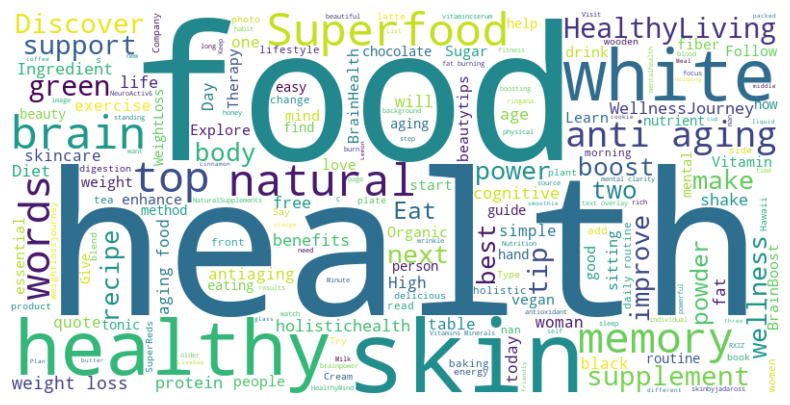

<Figure size 640x480 with 0 Axes>

In [65]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_pinterest.jpg')
wordcloud_file = 'wordcloud_pinterest.jpg'
wordcloud.to_file(wordcloud_file)

plt.clf()

In [95]:
with pd.ExcelWriter('pinterest_analysis_results.xlsx', engine='xlsxwriter') as writer:
    df_main.to_excel(writer, sheet_name='Data', index=False)
    df_merge.to_excel(writer, sheet_name='Aggregated Data', index=False)
    
    workbook = writer.book
    summary_sheet = workbook.add_worksheet('Summary')
    images_sheet = workbook.add_worksheet('Images')
    images1_sheet = workbook.add_worksheet('Wordcloud')
    
    # Write sentiment analysis results to the Summary sheet
    summary_sheet.write('E1', 'Sentiment Analysis using VADER')
    summary_sheet.write('E2', f'Negative: {sentiment["neg"]}')
    summary_sheet.write('E3', f'Neutral: {sentiment["neu"]}')
    summary_sheet.write('E4', f'Positive: {sentiment["pos"]}')
    summary_sheet.write('E5', f'Compound: {sentiment["compound"]}')
    
    summary_sheet.write('H1', 'TextBlob Sentiment')
    summary_sheet.write('H2', 'Polarity')
    summary_sheet.write('H3', sentiment1.polarity)
    summary_sheet.write('H4', 'Subjectivity')
    summary_sheet.write('H5', sentiment1.subjectivity)
    counts_df.to_excel(writer,sheet_name='Summary')
    # Insert images into the Images sheet
    
    images_sheet.insert_image('A1', 'Count_of_hashtags.png')
    images_sheet.insert_image('A100', 'count_of_extracted_hashtags.png')
    images1_sheet.insert_image('A1', wordcloud_file)
    



